## Loading Data

In [1]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Set label size for plots
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [2]:
data = np.genfromtxt('../Dataset/diabetes.data', delimiter='\t')
data=np.delete(data,0,0)
features = ['age', 'sex', 'body mass index', 'blood pressure', 
            'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']
x = data[:,0:10] # predictors
y = data[:,10] # response variable

In [3]:
print("Shape of x=",x.shape," Shape of y=",y.shape)

Shape of x= (442, 10)  Shape of y= (442,)


## Using only one Feature

In [4]:
def one_feature_regression(x,y,f):
    if (f < 0) or (f > 9):
        print("Feature index is out of bounds")
        return
    regr = linear_model.LinearRegression()
    x1 = x[:,[f]]
    regr.fit(x1, y)
    # Make predictions using the model
    y_pred = regr.predict(x1)
    # Plot data points as well as predictions
    plt.plot(x1, y, 'bo')
    plt.plot(x1, y_pred, 'r-', linewidth=3)
    plt.xlabel(features[f], fontsize=14)
    plt.ylabel('Progression of disease', fontsize=14)
    plt.show()
    #print("Mean squared error: ", mean_squared_error(y, y_pred))
    return(regr,mean_squared_error(y, y_pred))

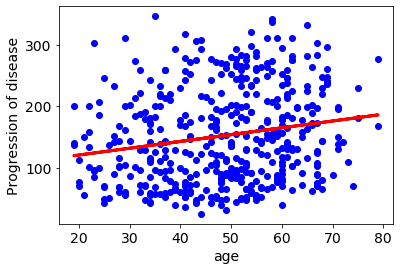

w =  [1.10495671]
b =  98.52308429923741


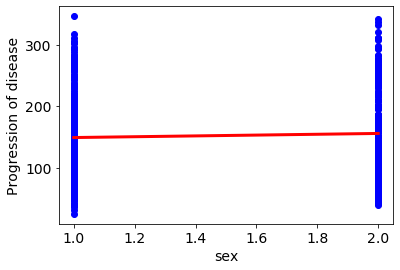

w =  [6.64539007]
b =  142.3758865248227


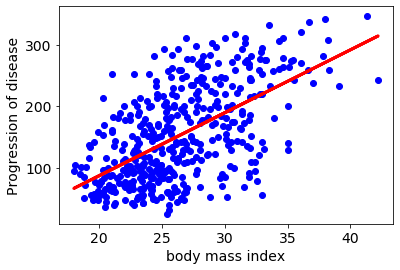

w =  [10.23312787]
b =  -117.77336656656527


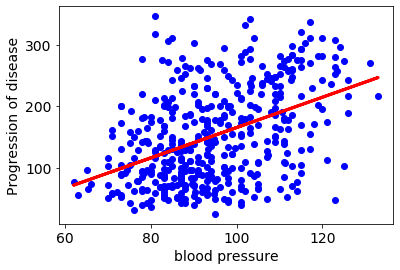

w =  [2.46073731]
b =  -80.76795381623228


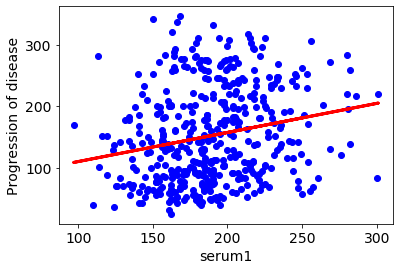

w =  [0.47230194]
b =  62.8021662163996


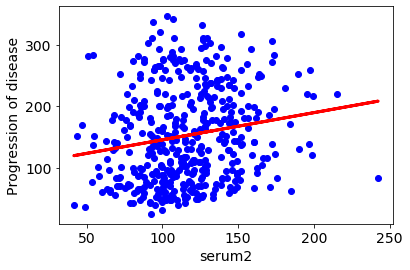

w =  [0.44120206]
b =  101.2014976910834


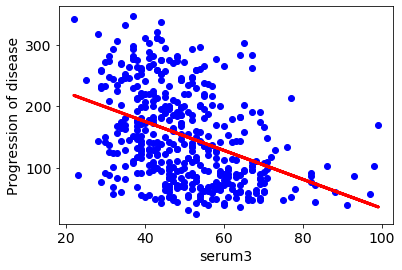

w =  [-2.35310142]
b =  269.2907838409806


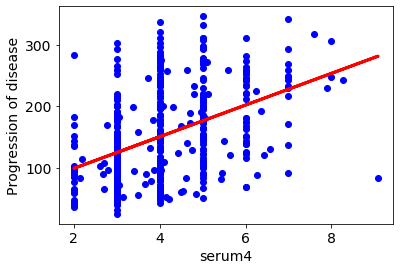

w =  [25.71576493]
b =  47.46392104759451


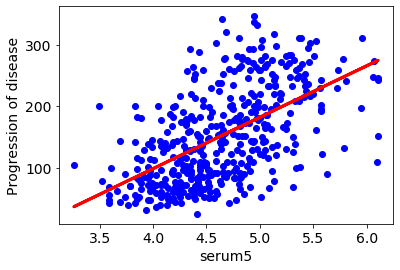

w =  [83.51144243]
b =  -235.47743162196574


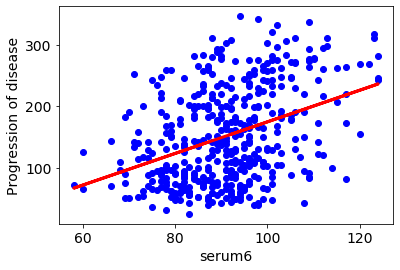

w =  [2.56488713]
b =  -81.9385793147699


In [5]:
for i in range(10):
    regr,mse = one_feature_regression(x,y,i)
    print("w = ", regr.coef_)
    print("b = ", regr.intercept_)

## Using multiple features

In [6]:
def feature_subset_regression(x,y,flist):
    if len(flist) < 1:
        print("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print("Feature index is out of bounds")
            return
    regr = linear_model.LinearRegression()
    regr.fit(x[:,flist], y)
    return regr

In [7]:
flist = [2,8]
regr = feature_subset_regression(x,y,[2,8])
print("w = ", regr.coef_)
print("b = ", regr.intercept_)
print("Mean squared error: ", mean_squared_error(y, regr.predict(x[:,flist])))

w =  [ 7.27600054 56.05638703]
b =  -299.95751508023613
Mean squared error:  3205.1900768248533


In [8]:
from itertools import combinations 
for k in range(1,11):
    comb = combinations(range(10), k)
    mselist=[]
    regrlist=[]
    combina=[]
    for i in list(comb):
        regr = feature_subset_regression(x,y,list(i))
        mse=mean_squared_error(y, regr.predict(x[:,list(i)]))
        mselist.append(mse)
        regrlist.append(regr)
        combina.append(i)
    minpos = mselist.index(min(mselist))
    print("Using",k,"features at a time the best linear regression:")
    print("w = ", regrlist[minpos].coef_)
    print("b = ", regrlist[minpos].intercept_)
    print("Mean squared error: ", mean_squared_error(y, regrlist[minpos].predict(x[:,combina[minpos]])))
    print("======================================================================")

Using 1 features at a time the best linear regression:
w =  [10.23312787]
b =  -117.77336656656527
Mean squared error:  3890.456585461273
Using 2 features at a time the best linear regression:
w =  [ 7.27600054 56.05638703]
b =  -299.95751508023613
Mean squared error:  3205.1900768248533
Using 3 features at a time the best linear regression:
w =  [ 6.50005135  0.90296342 49.57713784]
b =  -334.8811744147389
Mean squared error:  3083.0513432257203
Using 4 features at a time the best linear regression:
w =  [ 6.52842848  0.9339639  -0.28436754 58.85874223]
b =  -327.8581327510177
Mean squared error:  3012.288243358506
Using 5 features at a time the best linear regression:
w =  [-22.47424026   5.64307682   1.12316494  -1.06441609  43.23441272]
b =  -217.68486898273082
Mean squared error:  2913.758270125212
Using 6 features at a time the best linear regression:
w =  [-21.59101104   5.71110674   1.12655255  -1.04287641   0.84327695
  73.30652641]
b =  -313.76662274783644
Mean squared error:

## Splitting into test set and training set

In [9]:
def split_data(n_train):
    if (n_train < 0) or (n_train > 442):
        print("Invalid number of training points")
        return
    np.random.seed(0)
    perm = np.random.permutation(442)
    training_indices = perm[range(0,n_train)]
    test_indices = perm[range(n_train,442)]
    trainx = x[training_indices,:]
    trainy = y[training_indices]
    testx = x[test_indices,:]
    testy = y[test_indices]
    return trainx, trainy, testx, testy

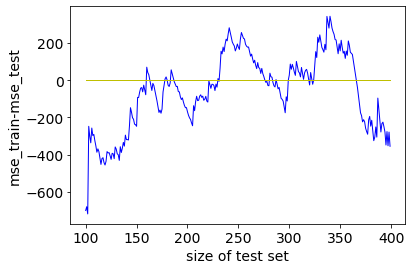

In [10]:
differ=[]
for i in range(100,400):
    trainx, trainy, testx, testy = split_data(i)
    regr = feature_subset_regression(trainx,trainy,range(0,10))
    mse_train=mean_squared_error(trainy, regr.predict(trainx))
    mse_test=mean_squared_error(testy, regr.predict(testx))
    diff=mse_train-mse_test
    differ.append(diff)

zerol=[0]*300
plt.plot(range(100,400), differ, 'b-', linewidth=1)
plt.plot(range(100,400),zerol , 'y-', linewidth=1)
plt.xlabel('size of test set', fontsize=14)
plt.ylabel('mse_train-mse_test', fontsize=14)
plt.show()